# Linear Regression on Rise in Sea Levels

In [69]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [70]:
# Read CSV file into Pandas DataFrame
sea_lvl = pd.read_csv('climate_data.csv')
sea_lvl.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [71]:
sea_lvl = sea_lvl.rename(columns={"Average dewpoint (°F)":"avg_dewpoint", "Average temperature (°F)":"avg_temp"})

In [72]:
# Assign the data to X and y
X = sea_lvl.avg_temp.values.reshape(-1, 1)
y = sea_lvl.avg_dewpoint.values.reshape(-1,1)
y

array([[12.7],
       [14.7],
       [12.7],
       ...,
       [48.9],
       [47.4],
       [45.3]])

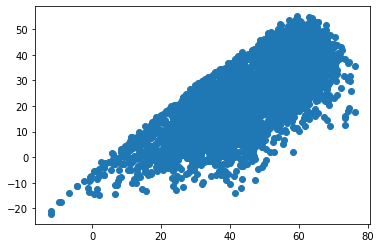

In [73]:
# Plot the data

plt.scatter(X,y)

In [74]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()


In [75]:
model.fit(X, y)

LinearRegression()

In [76]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.73026336]]
y-axis intercept:  [-9.49436205]


In [77]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-12.1]]
Max X Value: [[76.3]]


In [78]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

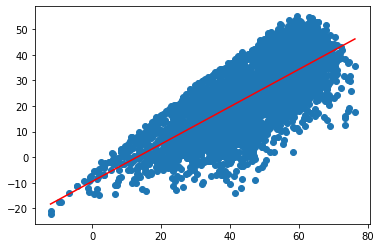

In [79]:
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 88.8595506124897
R-squared (R2 ): 0.5849655662445122


In [81]:
# Overall Score for the model
model.score(X, y)

0.5849655662445122

In [82]:
sea_lvl = sea_lvl.rename(columns={"Rainfall for year (in)":"rainfall_for_year", "Average temperature (°F)":"avg_temp"})

In [83]:
# Assign the data to X and y
X = sea_lvl.avg_temp.values.reshape(-1, 1)
y = sea_lvl.rainfall_for_year.values.reshape(-1,1)
y

array([[0.  ],
       [0.  ],
       [0.  ],
       ...,
       [4.47],
       [4.47],
       [4.49]])

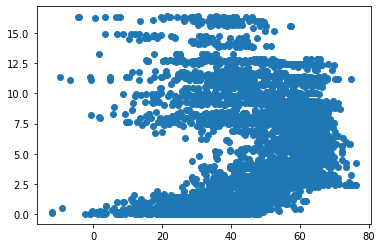

In [84]:
# Plot the data

plt.scatter(X,y)

In [85]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()


In [86]:
model.fit(X, y)

LinearRegression()

In [87]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.06009041]]
y-axis intercept:  [2.80188855]


In [88]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-12.1]]
Max X Value: [[76.3]]


In [89]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

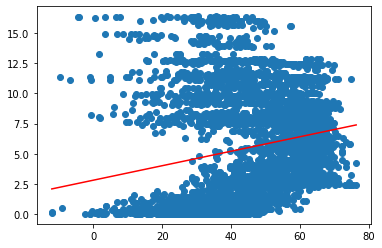

In [90]:
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [91]:
# Overall Score for the model
model.score(X, y)

0.041253889189301285

In [92]:
import seaborn as sns

In [93]:
sea_lvl.drop(columns=(["Date", "Date1"]), inplace=True)

<AxesSubplot:>

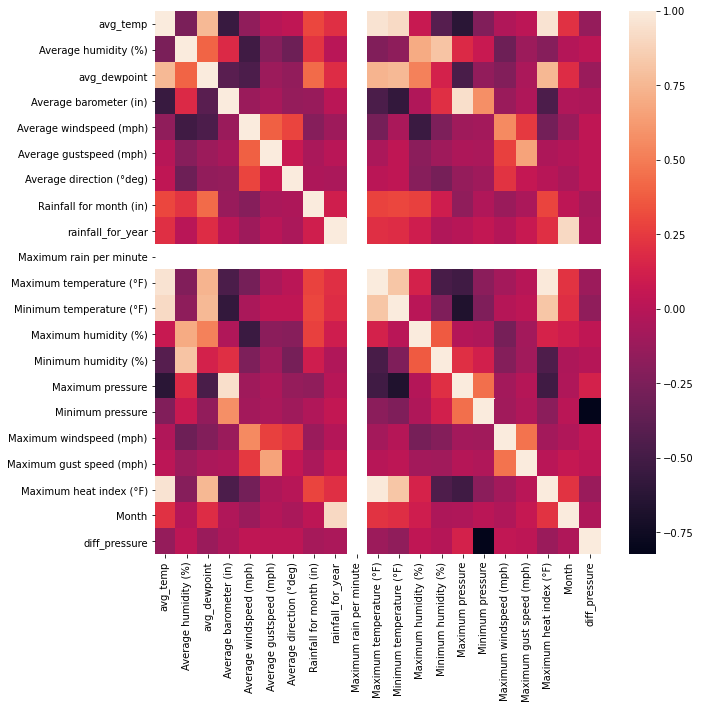

In [96]:
plt.figure(figsize= (10,10))
sns.heatmap(sea_lvl.corr())

In [ ]:
sns.FacetGrid(sea_lvl, col="rainfall_for_year", row="avg_temp")